In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
def plot_issing(T):
    df_cold = pd.read_csv(f'./Datos/issing_2d_cold_t{T}.csv')
    x_cold = df_cold["sweep"]
    y_cold = df_cold["H"]

    df_hot = pd.read_csv(f'./Datos/issing_2d_hot_t{T}.csv')   
    x_hot = df_hot["sweep"]
    y_hot = df_hot["H"]

    L = df_cold["L"][0]
    T = df_cold["T"][0]
    y_cold = y_cold/L**2 # Normalizamos la energía por sitio
    y_hot = y_hot/L**2

    min=-2
    mean_cold=np.mean(y_cold)
    mean_hot=np.mean(y_hot)

    plt.figure(figsize=(20,5))

    plt.plot(x_cold,y_cold,ls="-",marker="o",label=f"cold Mean:{round(mean_cold,2)}")#cold
    plt.plot(x_hot,y_hot,ls="-",marker="o",label=f"hot Mean:{round(mean_hot,2)}")#hot

    plt.xlabel('Sweep')
    plt.ylabel('$\\frac{<H>}{V}$')
    plt.title('Issing model 2D\n L=%d, T=%1.1f'%(L,T))
    plt.axhline(y=min, color='k',label="H_min")

    plt.axhline(y=mean_cold, color='r')
    plt.axhline(y=mean_hot, color='b')

    plt.legend()

    plt.show()
    return df_cold,df_hot

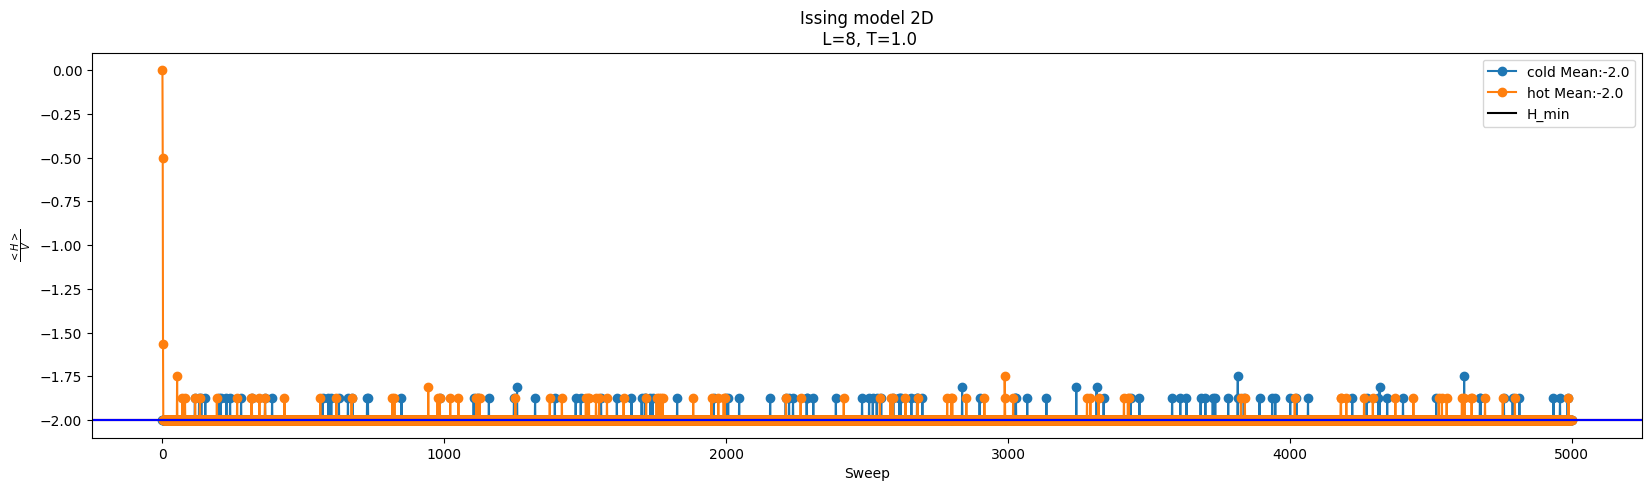

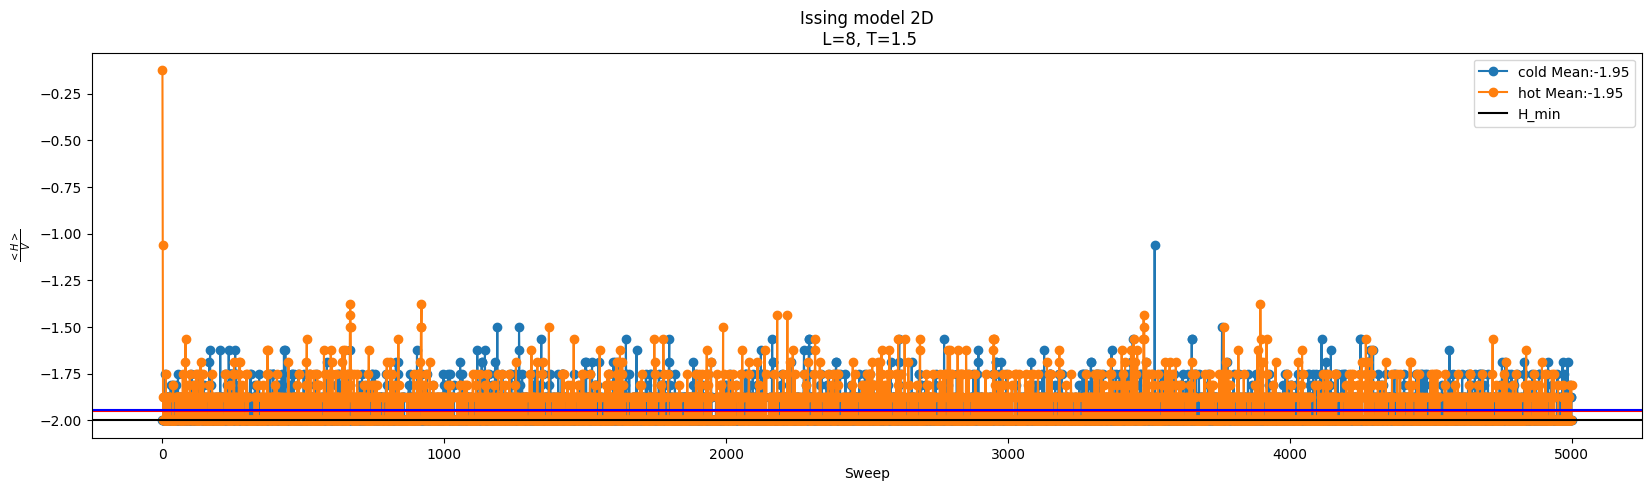

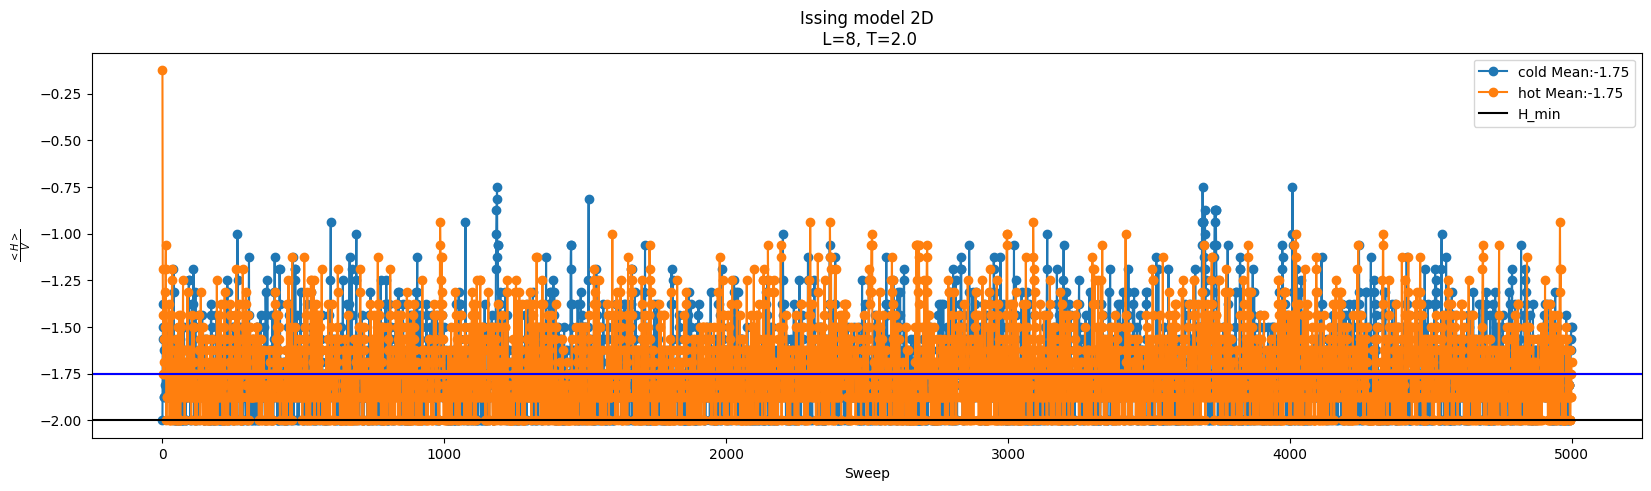

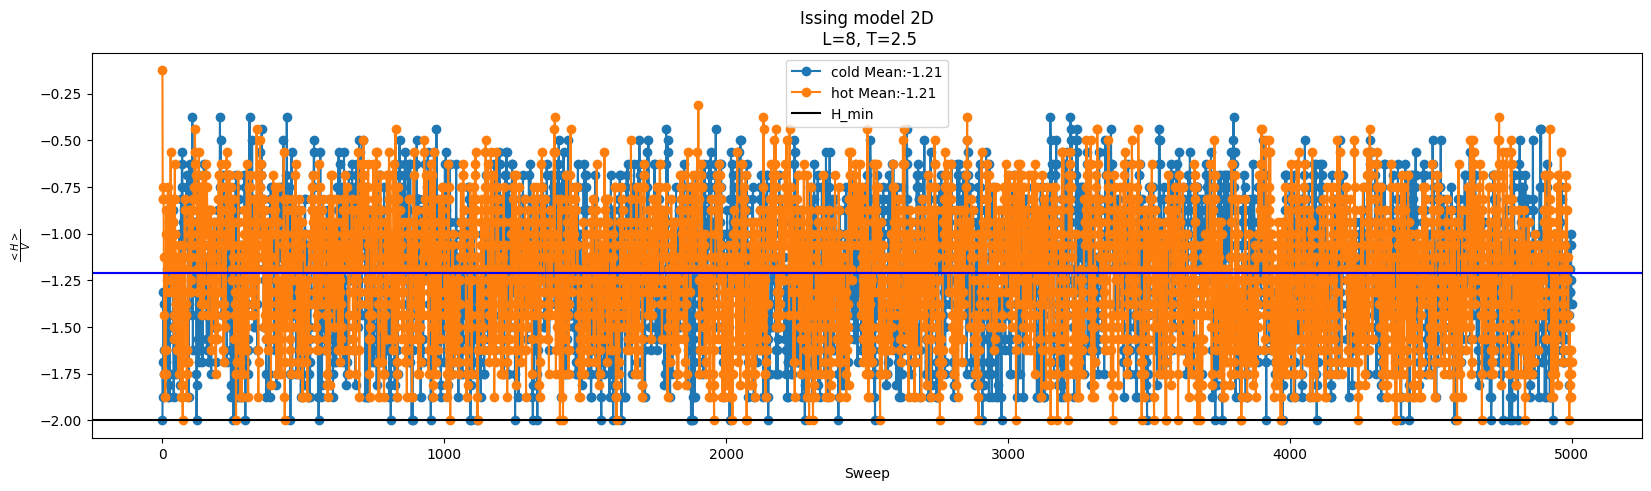

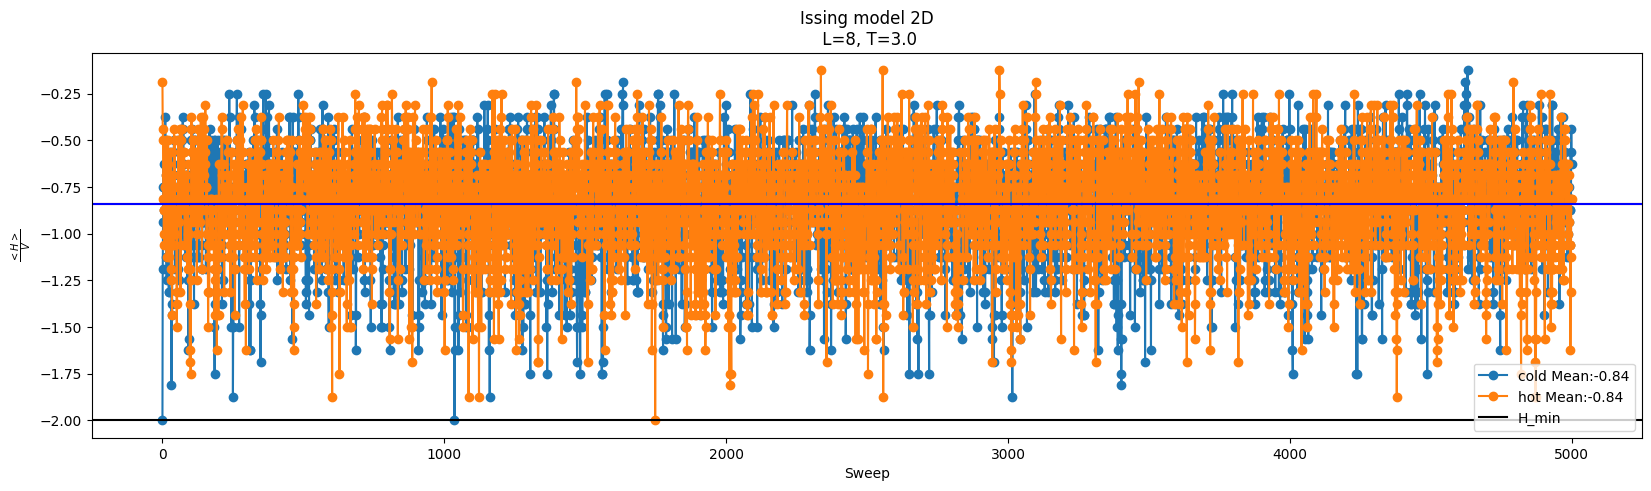

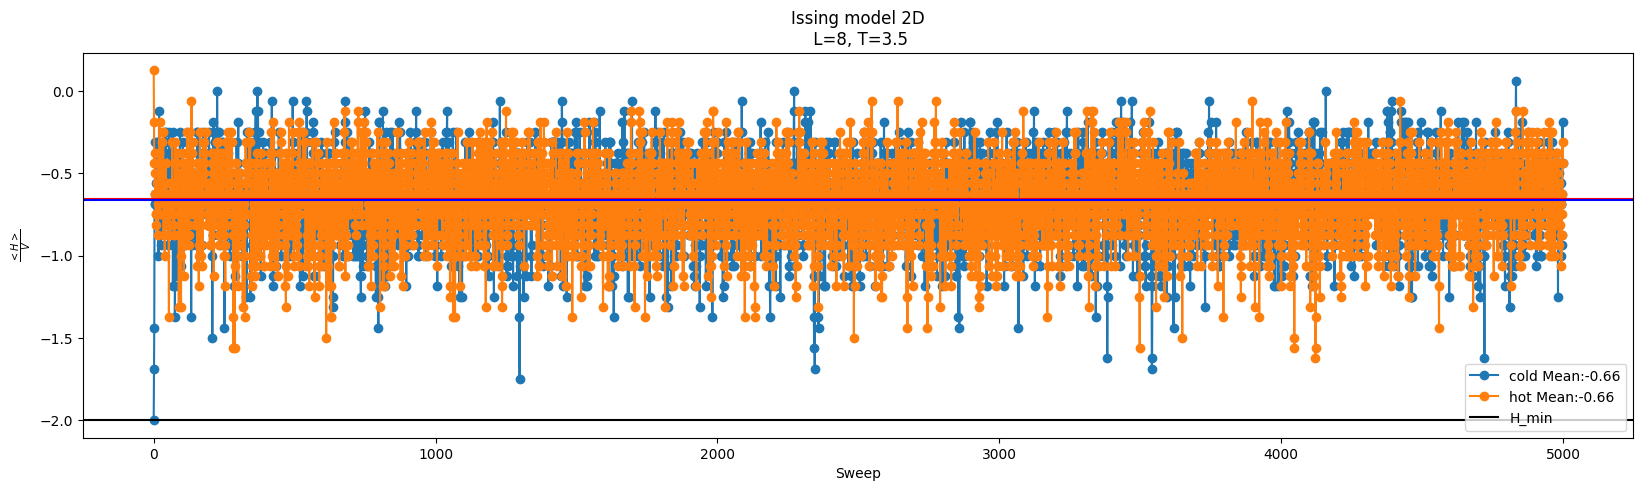

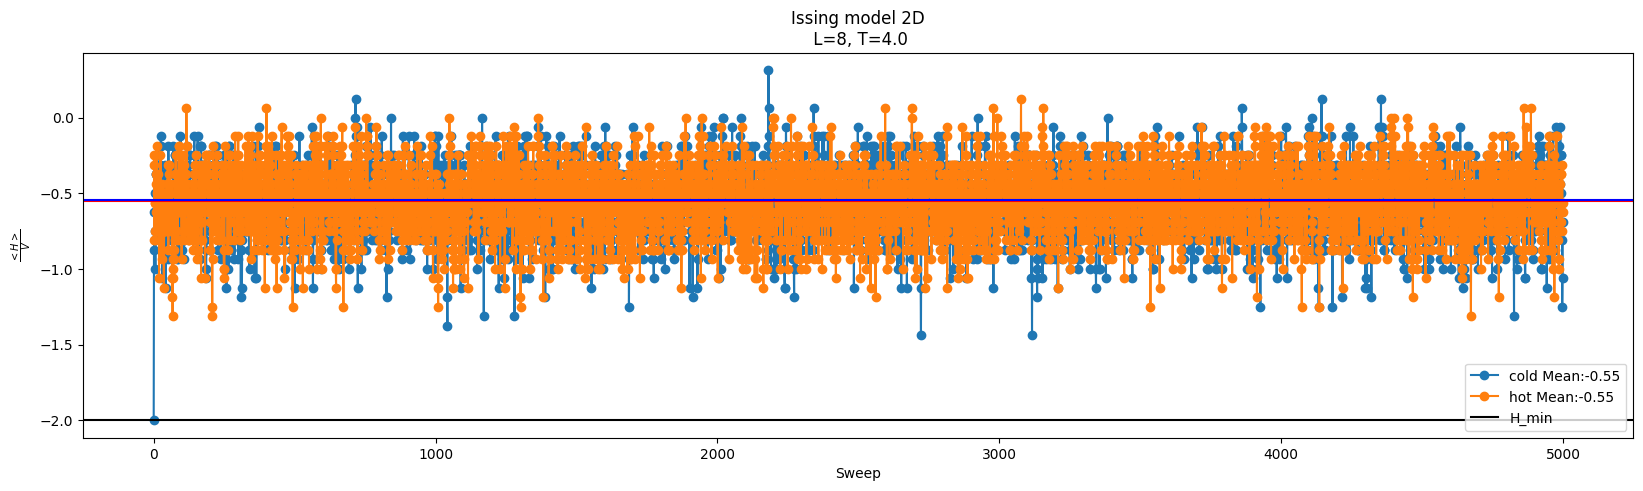

In [15]:
df_t1_cold,df_t1_hot = plot_issing(1)
df_t15_cold,df_t15_hot = plot_issing(15)
df_t2_cold,df_t2_hot = plot_issing(2)
df_t25_cold,df_t25_hot = plot_issing(25)
df_t3_cold,df_t3_hot = plot_issing(3)
df_t35_cold,df_t35_hot = plot_issing(35)
df_t4_cold,df_t4_hot = plot_issing(4)

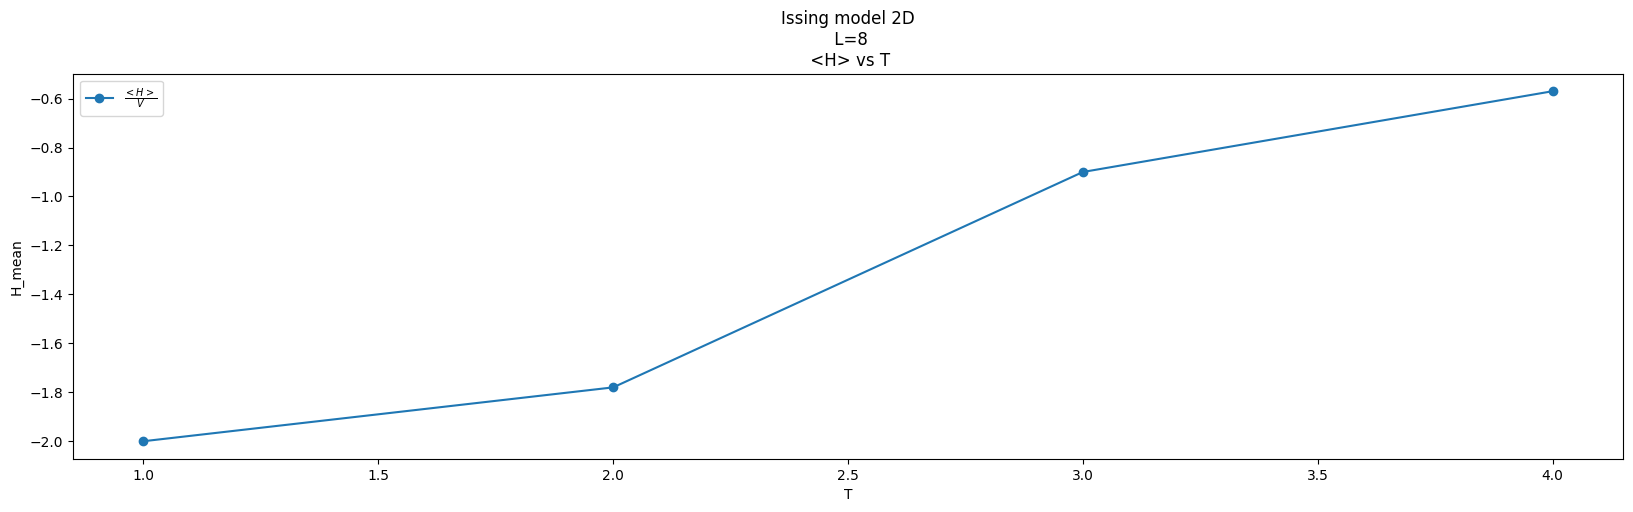

In [10]:
H_mean = np.array([-0.57,-0.9,-1.78,-2])
T = np.array([4,3,2,1])

plt.figure(figsize=(20,5))

plt.plot(T,H_mean,ls="-",marker="o",label="$\\frac{<H>}{V}$")#cold

plt.xlabel('T')
plt.ylabel('H_mean')
plt.title('Issing model 2D\n L=8\n <H> vs T')

plt.legend()

plt.show()

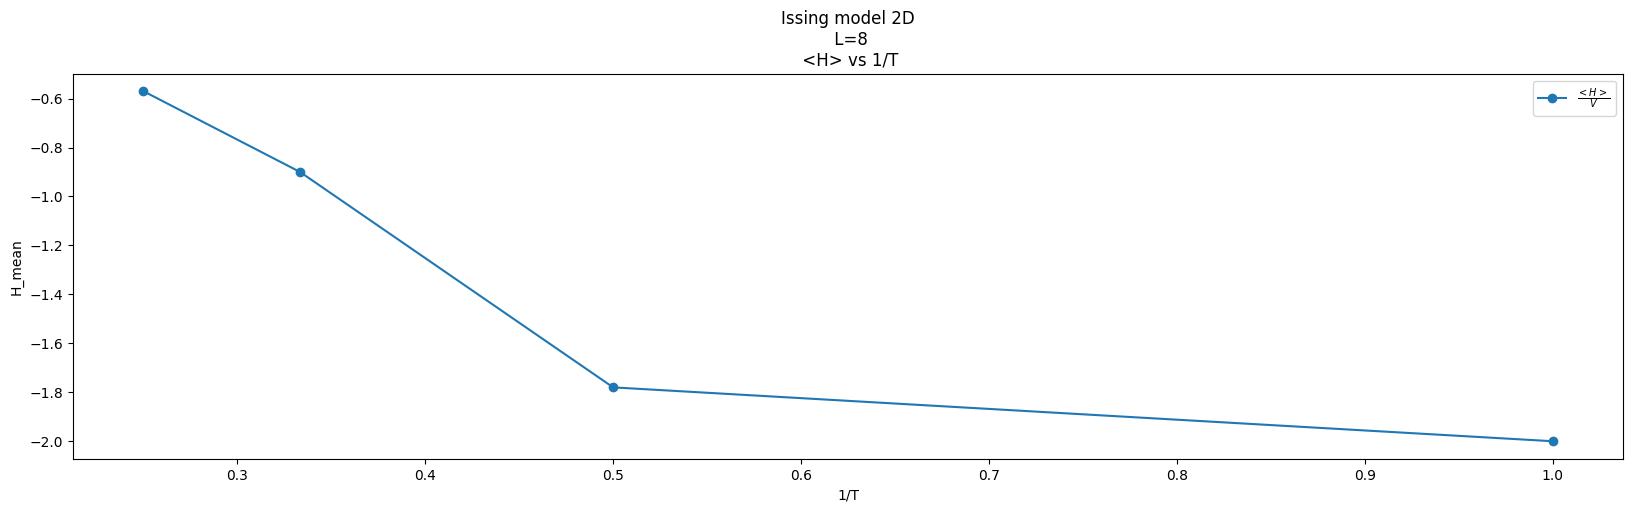

In [11]:
H_mean = np.array([-0.57,-0.9,-1.78,-2])
T = np.array([4,3,2,1])

plt.figure(figsize=(20,5))

plt.plot(1/T,H_mean,ls="-",marker="o",label="$\\frac{<H>}{V}$")#cold

plt.xlabel('1/T')
plt.ylabel('H_mean')
plt.title('Issing model 2D\n L=8\n <H> vs 1/T')

plt.legend()

plt.show()

In [12]:
def mean_se(steps,df_cold,df_hot,initial=50):
    l_cold=[]
    l_hot=[]
    for i in range(initial,len(df_cold),steps):
        l_cold+=[df_cold["H"][i]]
        l_hot+=[df_hot["H"][i]]
        

    msec = np.mean(l_cold), np.sqrt(np.var(l_cold)/len(l_cold)) #mean standard error cold start 
    mseh = np.mean(l_hot), np.sqrt(np.var(l_hot)/len(l_hot)) #mean standard error hot start

    #print(f"mean: {msec[0]}, se: {msec[1]}")

    return msec,mseh
    print(f"mean cold interval:[{msec[0]-msec[1]},{msec[0]+msec[1]}]")
    print(f"mean hot interval:[{mseh[0]-mseh[1]},{mseh[0]+mseh[1]}]")

    

In [18]:

mean_se(60,df_t25_cold,df_t25_hot)

((-79.18072289156626, 2.1955592348415798),
 (-74.89156626506023, 1.8506441423658508))

$c_V=\frac{1}{V}(<H²>-<H>²)$

para SE $<H²<H>²>$ 

la magnetización $M=\sum_{x,y}s_{x,y}$  y la densidad de magnetización $m=\frac{1}{V}<|M|>$ y de la teoría deberíamos obtener algo cercano a $<M>=0$

gráfica m vs T, gráfica cv vs T